

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Vía Segura: Análisis de datos para la seguridad vial en Barcelona

**Script**: Análisis de las causas mediatas

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import random
from tabulate import tabulate

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosCausaMediata.csv"

# Cargar el archivo en un DataFrame
df_causamediata = pd.read_csv(path)

In [3]:
df_causamediata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62357 entries, 0 to 62356
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Numero_expedient          62357 non-null  object 
 1   Codi_districte            62357 non-null  int64  
 2   Nom_districte             62357 non-null  object 
 3   Codi_barri                62357 non-null  int64  
 4   Nom_barri                 62357 non-null  object 
 5   Codi_carrer               62357 non-null  int64  
 6   Nom_carrer                62356 non-null  object 
 7   Num_postal                57557 non-null  object 
 8   Descripcio_dia_setmana    62357 non-null  object 
 9   Any                       62357 non-null  int64  
 10  Mes_any                   62357 non-null  int64  
 11  Dia_mes                   62357 non-null  int64  
 12  Hora_dia                  62357 non-null  int64  
 13  Descripcio_torn           62357 non-null  object 
 14  Descri

## Frecuencia Causa Mediata

**Causa mediata**: el accidente viene dado por la conexión de este hecho con factores externos del resultado en tiempo, lugar o grado. Es decir, es la causa del accidente que tiene lugar en un momento más lejano en relación a la causa inmediata pero que tiene una influencia directa en la ocurrencia del accidente. ( Fuente: https://www.termcat.cat/es/cercaterm/fitxa/NDcyMTQ3OA%3D%3D )



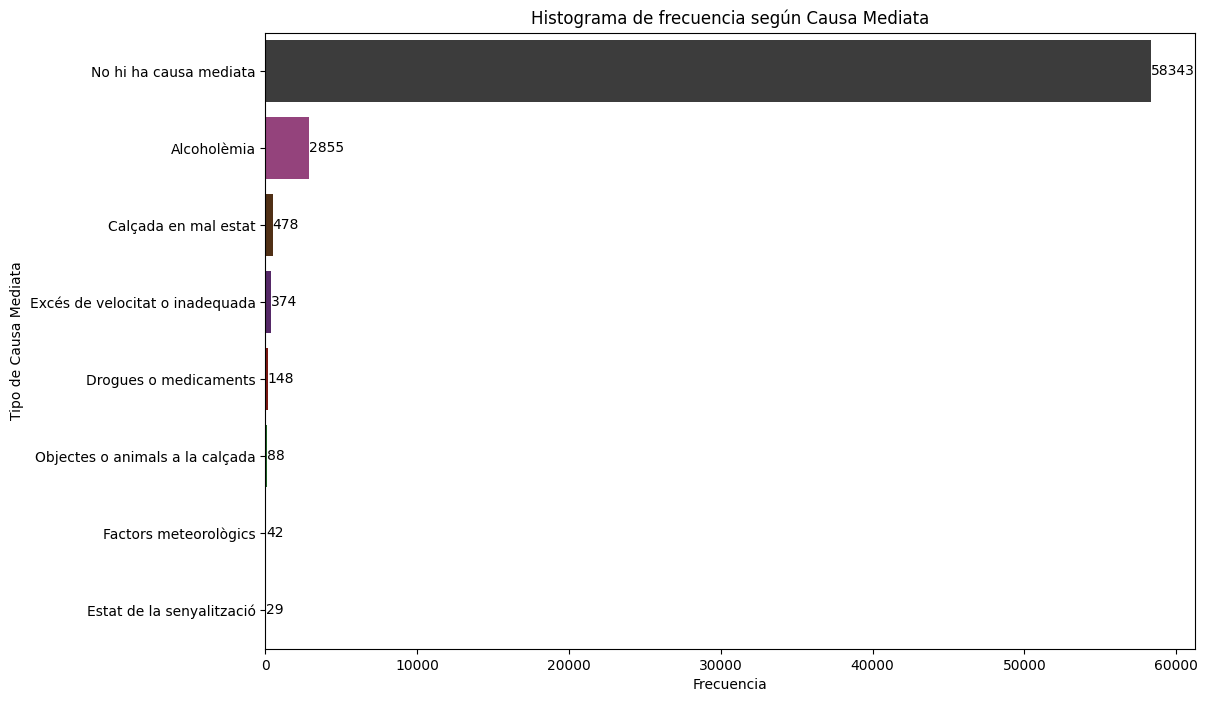

In [4]:
columna = 'Descripcio_causa_mediata'

plt.figure(figsize=(12, 8))
barplot=sns.barplot(y=df_causamediata[columna].value_counts().index, x=df_causamediata[columna].value_counts(), orient='h',hue=df_causamediata[columna].value_counts(), palette='dark', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Causa Mediata')
plt.title('Histograma de frecuencia según Causa Mediata')

for index, value in enumerate(df_causamediata[columna].value_counts()):
    barplot.text(value, index, str(value), ha='left', va='center')

plt.show()

## Causa mediata según turno

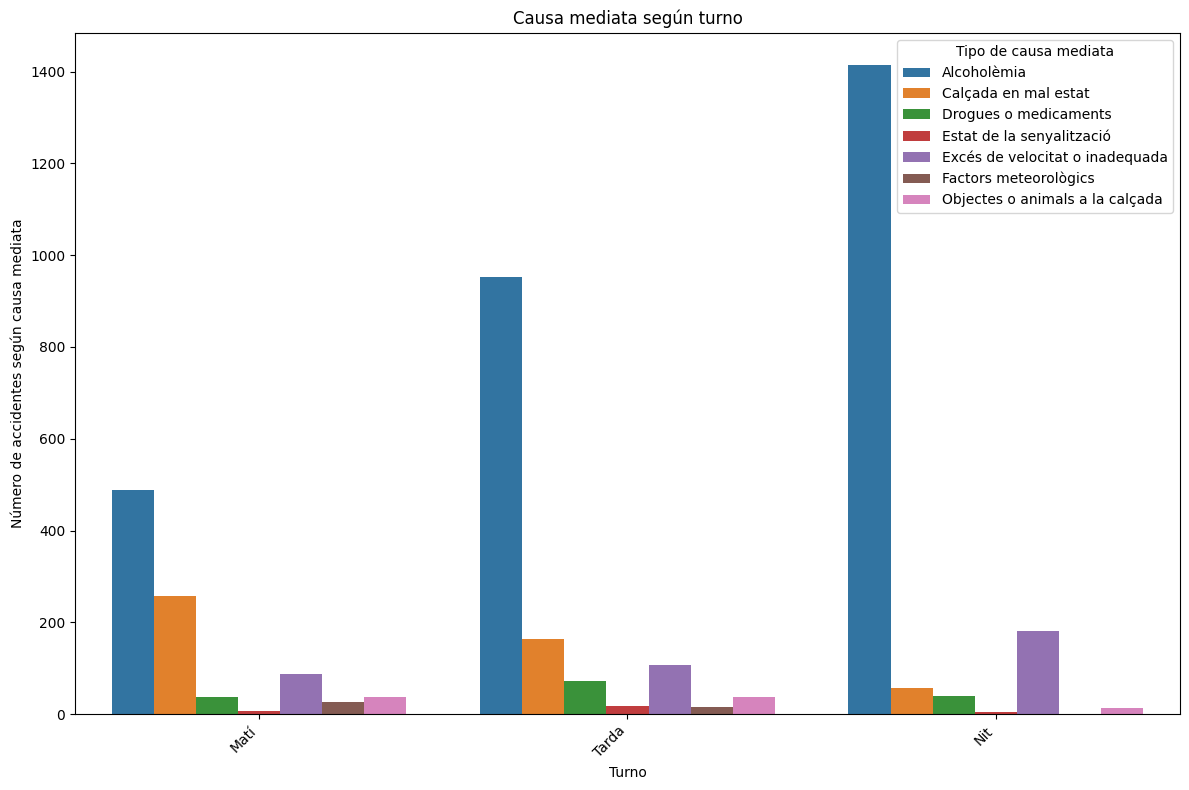

In [5]:
#vamos a ver cuándo se está dando las causas de accidente mediatas segun el turno

# Primero filtraremos 'Descripcio_causa_mediata' donde no haya causa mediata, es decir, donde el valor de esa no columna sea: 'No hi ha causa mediata'
df_causamediata_por_turno_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] != 'No hi ha causa mediata']
df_causamediata_por_turno = df_causamediata_por_turno_filtrado.groupby(['Descripcio_torn', 'Descripcio_causa_mediata']).size().reset_index(name='counts')

orden_eje_x = ['Matí', 'Tarda', 'Nit']

plt.figure(figsize=(12, 8))
sns.barplot(x='Descripcio_torn', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_turno, order=orden_eje_x)
plt.title('Causa mediata según turno')
plt.xlabel('Turno')
plt.ylabel('Número de accidentes según causa mediata')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata')
plt.tight_layout()
plt.show()

Vemos como el nivel de alcohol en sangre es la mayor causa de siniestralidad a priori dentro de las diferentes causas de accidentes. Y esta causa aumenta en proporción a medida que nos acercamos a la noche.

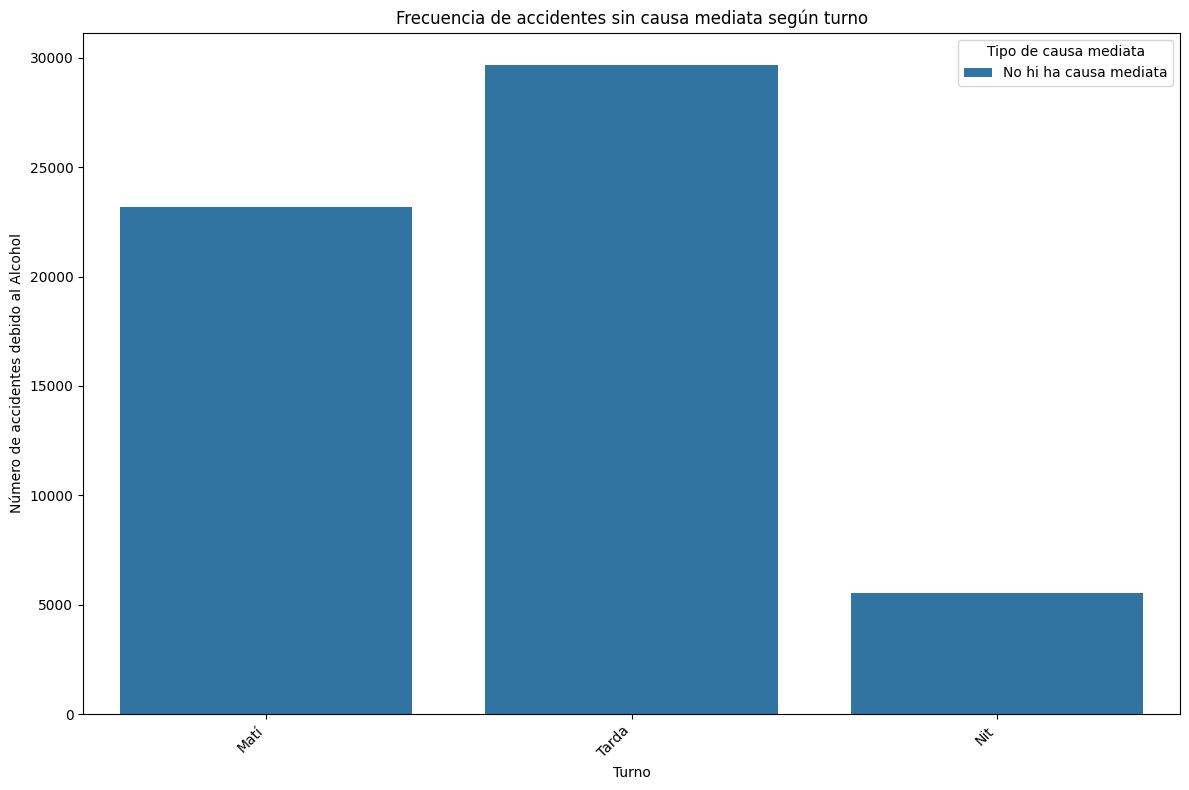

In [6]:
#como curiosidad podriamos ver los que no tienen causa, cuando se dan mas frecuentemente.
# Simplemente ahora filtraremos donde sí hay causa mediata, es decir, donde el valor de esa columna sea: 'No hi ha causa mediata'

df_causamediata_por_turno_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] == 'No hi ha causa mediata']
df_causamediata_por_turno = df_causamediata_por_turno_filtrado.groupby(['Descripcio_torn', 'Descripcio_causa_mediata']).size().reset_index(name='counts')

orden_eje_x = ['Matí', 'Tarda', 'Nit']

plt.figure(figsize=(12, 8))
sns.barplot(x='Descripcio_torn', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_turno, order=orden_eje_x)
plt.title('Frecuencia de accidentes sin causa mediata según turno')
plt.xlabel('Turno')
plt.ylabel('Número de accidentes debido al Alcohol')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata')
plt.tight_layout()
plt.show()

## ¿Cuándo se dan más accidentes debidos al Alcohol como factor externo?

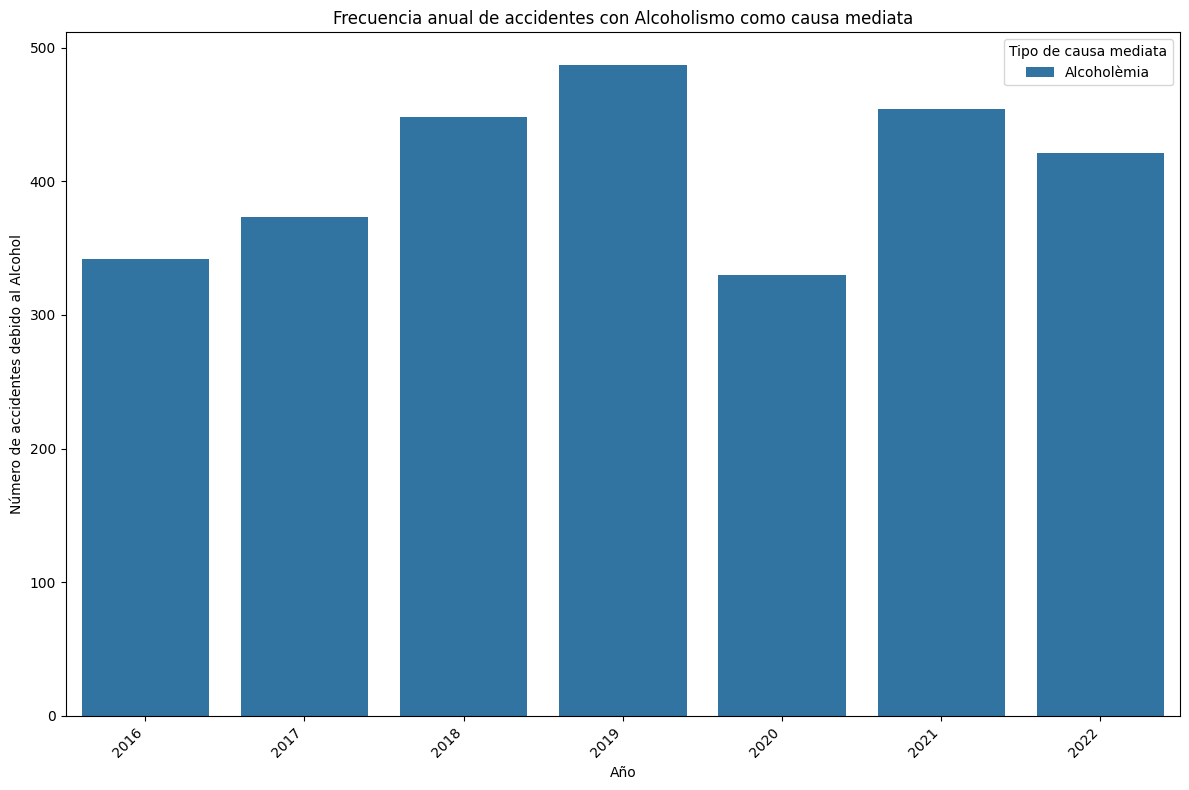

In [7]:
#podemos empezar viendo por Año
df_causamediata_por_anyo_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] == 'Alcoholèmia']
df_causamediata_por_anyo = df_causamediata_por_anyo_filtrado.groupby(['Any', 'Descripcio_causa_mediata']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Any', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_anyo)
plt.title('Frecuencia anual de accidentes con Alcoholismo como causa mediata')
plt.xlabel('Año')
plt.ylabel('Número de accidentes debido al Alcohol')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata')
plt.tight_layout()
plt.show()

Se puede observar como ha habido una evolución creciente de 2016 hasta 2019. En 2020 se redujeron, probablemente debido a las restricciones de movilidad durante la pandemia del Covid-19. Parece haber una ligera tendencia decreciente a partir de 2021.

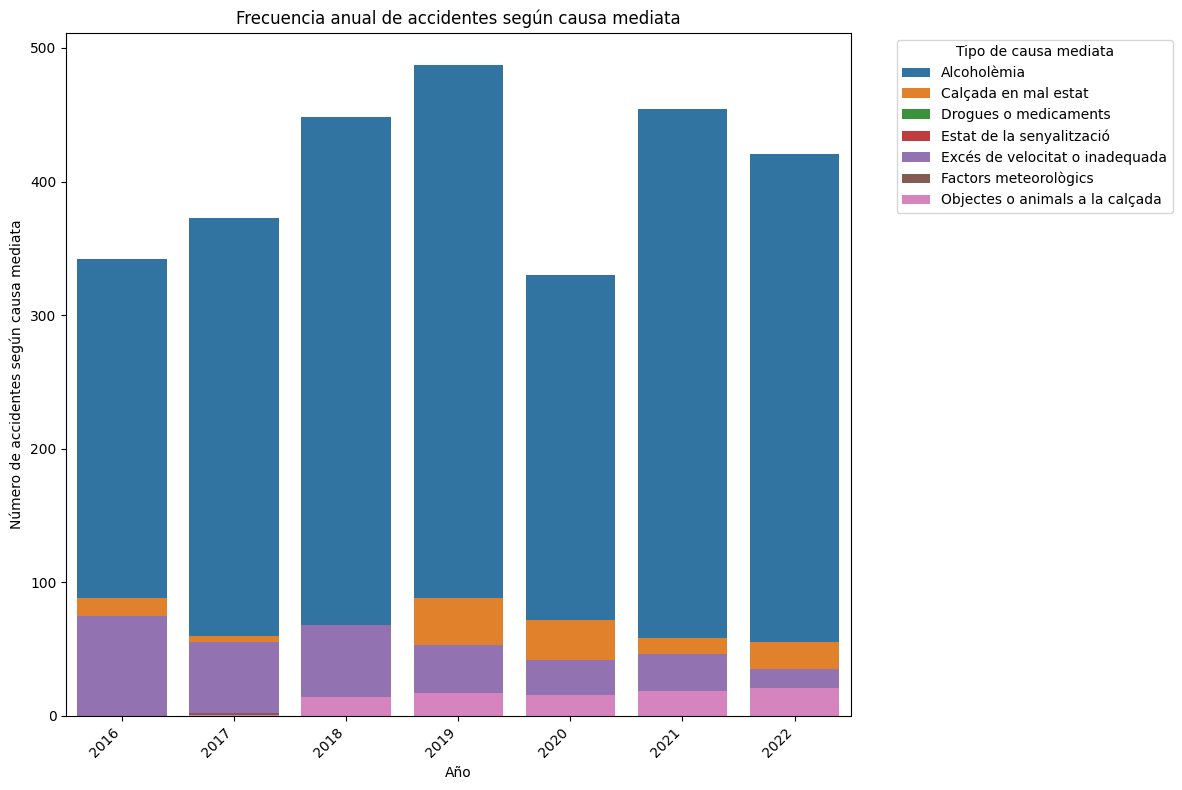

In [8]:
#vemos si realmente han disminuido, en general, todos los tipos de accidente con causa mediata
df_causamediata_por_anyo_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] != 'No hi ha causa mediata']
df_causamediata_por_anyo = df_causamediata_por_anyo_filtrado.groupby(['Any', 'Descripcio_causa_mediata']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Any', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_anyo, dodge=False)
plt.title('Frecuencia anual de accidentes según causa mediata')
plt.xlabel('Año')
plt.ylabel('Número de accidentes según causa mediata')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
#primero montamos un diccionario para que nos muestre correctamente el nombre de los meses
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

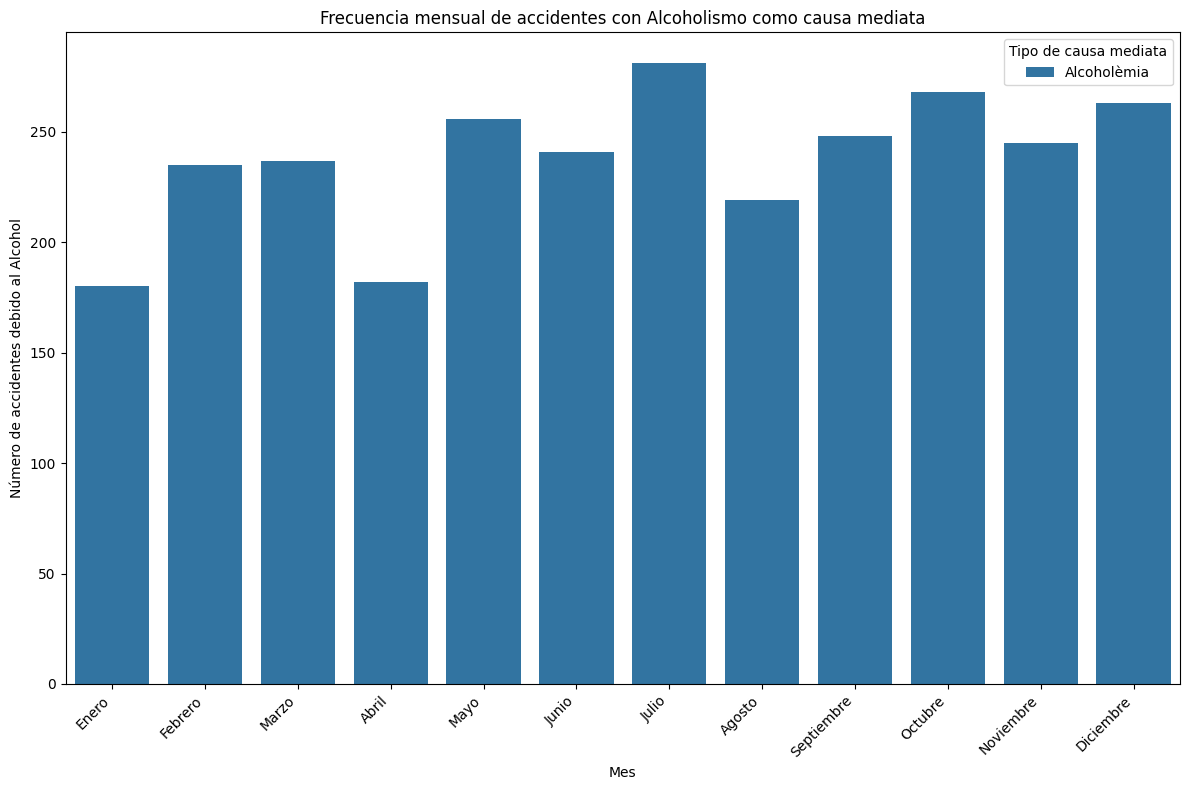

In [10]:
#ahora lo vemos según Meses (en general agrupandolo por todos los años)
#para ver si hay algun tipo de factor de estacionalidad

df_causamediata_por_mes_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] == 'Alcoholèmia']
df_causamediata_por_mes = df_causamediata_por_mes_filtrado.groupby(['Mes_any', 'Descripcio_causa_mediata']).size().reset_index(name='counts')
df_causamediata_por_mes_temp = df_causamediata_por_mes.copy()
df_causamediata_por_mes_temp['Mes_any'] = df_causamediata_por_mes_temp['Mes_any'].map(meses)


plt.figure(figsize=(12, 8))
sns.barplot(x='Mes_any', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_mes_temp,dodge=False)
plt.title('Frecuencia mensual de accidentes con Alcoholismo como causa mediata')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes debido al Alcohol')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata')
plt.tight_layout()
plt.show()

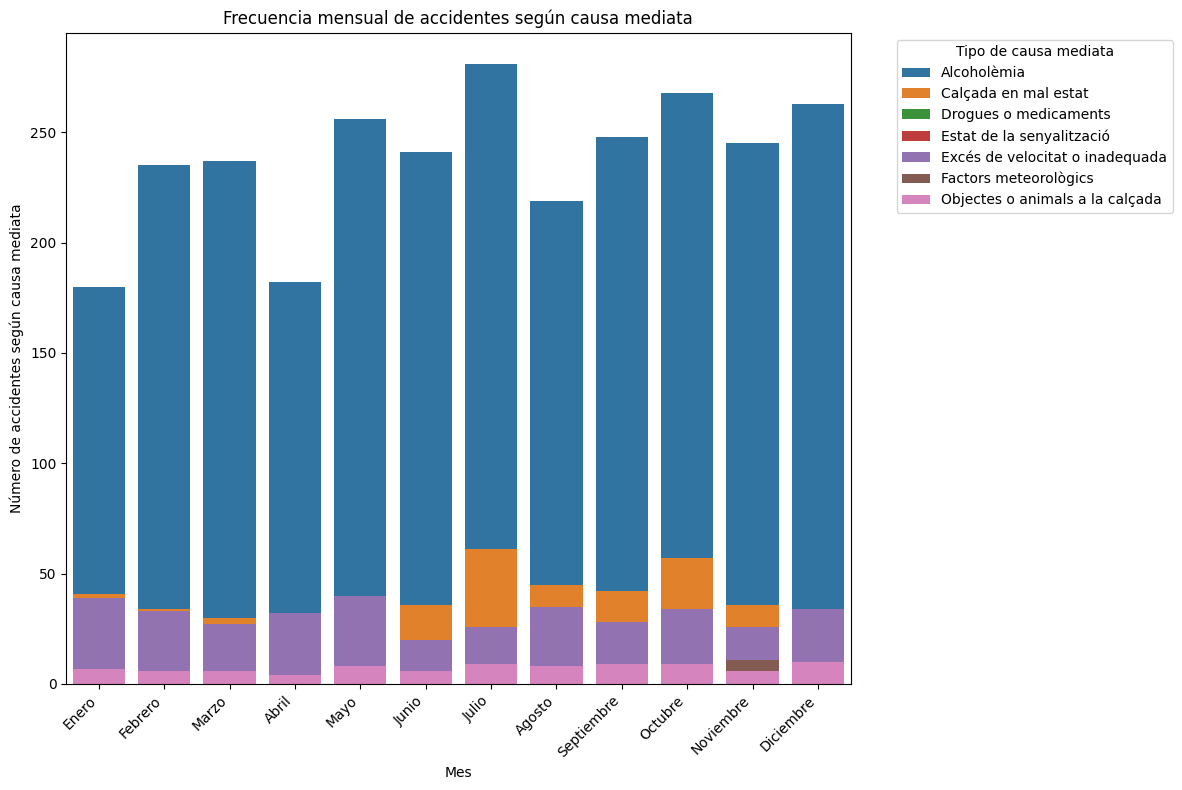

In [11]:
#ahora podemos ver con todas las causas en conjunto

df_causamediata_por_mes_filtrado = df_causamediata[df_causamediata['Descripcio_causa_mediata'] != 'No hi ha causa mediata']
df_causamediata_por_mes = df_causamediata_por_mes_filtrado.groupby(['Mes_any', 'Descripcio_causa_mediata']).size().reset_index(name='counts')
df_causamediata_por_mes_temp = df_causamediata_por_mes.copy()
df_causamediata_por_mes_temp['Mes_any'] = df_causamediata_por_mes_temp['Mes_any'].map(meses)


plt.figure(figsize=(12, 8))
sns.barplot(x='Mes_any', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_mes_temp, dodge=False)
plt.title('Frecuencia mensual de accidentes según causa mediata')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes según causa mediata')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## ¿ Hay algún distrito con mayor riesgo de accidente debido al mal estado de sus vías?

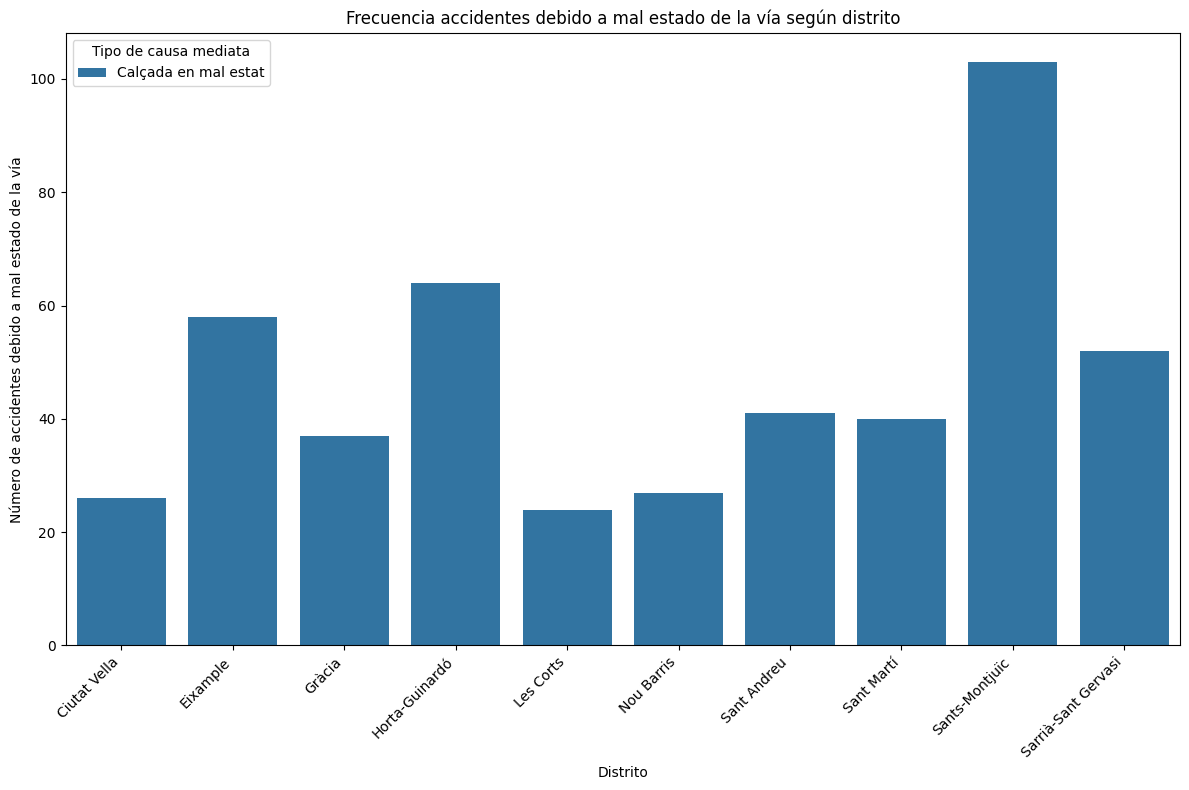

In [12]:
#tendremos que filtrar según el tipo de causa mediata 'Calçada en mal estat' y quitar los desconocidos de Nombre de distrito
df_causamediata_por_distrito_filtrado = df_causamediata[(df_causamediata['Descripcio_causa_mediata'] == 'Calçada en mal estat') & (df_causamediata['Nom_districte'] != 'Desconegut')]
df_causamediata_por_distrito = df_causamediata_por_distrito_filtrado.groupby(['Nom_districte', 'Descripcio_causa_mediata']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_districte', y='counts', hue='Descripcio_causa_mediata', data=df_causamediata_por_distrito)
plt.title('Frecuencia accidentes debido a mal estado de la vía según distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes debido a mal estado de la vía')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de causa mediata')
plt.tight_layout()
plt.show()


Vemos que el distrito donde hay más incidencia es Sants-Montjuïc. Ahora procedemos a ver como ha ido evolucionando los accidentes debido a esta causa a lo largo de estos distritos.

In [13]:
import plotly.graph_objs as go
import plotly.express as px

df_no_desconegut = df_causamediata[df_causamediata['Nom_districte'] != 'Desconegut']
df_causa_calzada_mal_estado = df_no_desconegut[df_no_desconegut['Descripcio_causa_mediata'] == 'Calçada en mal estat']
df_accidentes_por_distrito_y_anyo = df_causa_calzada_mal_estado.groupby(['Any', 'Nom_districte']).size().reset_index(name='counts')

fig = px.line(df_accidentes_por_distrito_y_anyo, x='Any', y='counts', color='Nom_districte',
              title='Evolución de accidentes debido a mal estado de la vía por distrito',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_districte': 'Distrito'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()